In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
dataset=dataset.dropna()

Pre-processing Data

In [25]:
dataset['Education'].unique()
dataset['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [26]:
# calculating the age of customers 
dataset['c_year'] = 2021
dataset['age'] = dataset['c_year']-dataset['Year_Birth']

# calculating the no of days as customers
dataset['c_date'] = '01-01-2015'
dataset['Dt_Customer'] =pd.to_datetime(dataset.Dt_Customer)
dataset['c_date'] = pd.to_datetime(dataset.c_date)
dataset['days_customer'] = (dataset['c_date']-dataset['Dt_Customer']).dt.days

# reducing some dimensions 

# defining two categories of expenses as on food ( fish+meat+ fruit) and as leisure_Expense ( wine, sweet, Gold)
dataset['leisure_Expense'] = dataset['MntWines']+ dataset['MntSweetProducts']+ dataset['MntGoldProds']
dataset['food'] = dataset['MntFishProducts'] + dataset['MntFruits'] + dataset['MntMeatProducts']

# defining accepted_any_cmp if customer have ever taken any campaign offer ( 1- yes, 0-no)
dataset['accepted_any_cmp']= dataset['AcceptedCmp1']+dataset['AcceptedCmp2']+dataset['AcceptedCmp3']+dataset['AcceptedCmp4']+dataset['AcceptedCmp5']+dataset['Response']
dataset['accepted_any_cmp']= np.where(dataset['accepted_any_cmp'] > 0, 1, 0)

# defining martial status as ( 0- single adult, 1- two adults)
mapping = {'Single' : 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,
       'Absurd': 0, 'YOLO': 0, 'Graduation': 1, 'PhD': 2, 'Master': 2, 'Basic': 0, '2n Cycle': 2}
dataset=dataset.replace({'Marital_Status': mapping, 'Education': mapping}) 

dataset['kid_teen'] = dataset['Kidhome'] + dataset['Teenhome']
dataset['kid_teen']= np.where(dataset['kid_teen'] > 0, 1, 0)

dataset.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'c_year', 'age', 'c_date', 'days_customer', 'leisure_Expense', 'food',
       'accepted_any_cmp', 'kid_teen'],
      dtype='object')

In [27]:
dataset=dataset[['Education', 'Marital_Status', 'Income', 'kid_teen',
       'Recency','leisure_Expense', 'food', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'accepted_any_cmp', 
       'Complain', 'age', 'days_customer']]

Training Model

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(dataset)

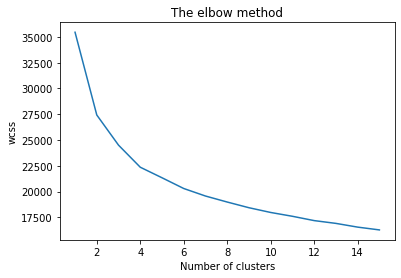

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [32]:
print(y_kmeans)

[0 4 1 ... 2 1 3]


Results

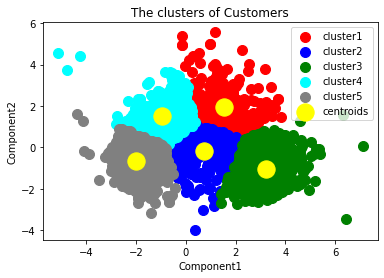

In [33]:
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='cluster1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='cluster2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='cluster3')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label='cluster4')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans == 4, 1], s = 100, c = 'gray', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.title('The clusters of Customers')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend()
plt.show()

Business takeaway of the recommendation.

We see that we have clustered the Customers quite well. However, there may be better things to do this clustering. We cannot determine how many we want and just guess segmentation to 5 categories. We see that the clustering with just 4 Features is quite amazing. We keep this clustering. We can clearly see that the customers are easily divided into 5 categories based on their lifestyles. So this clustering will help us gather targeted groups for certain promotions as we can easily identify which group will be the best option for a certain type of promotion.